## 9.1 심층신경망 
- 선형 회귀 또는 로지스틱 회귀 모델은 비선형 문제를 해결할 수 없다. 기존 ML기법은 비선형적이고 고차원의 데이터를 다루는 데 어려움이있다. 이런 문제를 개선하고자 딥러닝의 심층 신경망을 사용하게된다.

### 1. 심층신경망이란?
- 두 개의 선형 계층을 가진 모델이 두 개의 계층을 가진 심층 신경망이라고 할 수 없다. 왜냐하면 선형 계층을 아무리 깊게 쌓아도 하나의 선형 계층 마주게하게 되기 때문이다. 
- 8장에서 활성 함수를 배웠다. 교재 그림을 보듯이 이 함수는 전 구간에서 미분 가능한 비선형적인 잔도 증가 형태를 띈다.
- 비선형 문제를 푸는 간단한 방법은 선형 계층을 쌓을 때 그 사이에 같은 비선형 함수를 끼워 넣는 것이다.
![](https://heung-bae-lee.github.io/image/Deep_Neural_Network.png)
<center>심층신경망 예시</center>

### 2. 심층신경망의 크기
- DNN은 어떤 형태의 함수도 근사 계산이 가능하다는 것이 이론적으로 증명되었다. 그렇다면 신경망의 깊이와 너비를 조절하여 함수가 더 복잡한 형태의 데이터 관계나 문제를 해결할 수 있도록 할 수 있을 것이다.
- 보통 신경망을 구성할 때 점차 너비가 줄어드는 형태로 설계한다. 너비를 조절하거나 깊이를 더 깊게 쌓는다면 네트워크의 표현 능력은 일반적으로 더 향상된다.
- 하지만 무조건 너비를 줄이고 깊게만 쌓는것은 답이 아니다. 가중치 파라미터 크기가 늘어나고 SGD를 통해 최적화해야하는 공간의 차원 크기도 같이 늘어가게되기 때문이다.


## 9.2 DNN의 학습

### 1. DNN의 학습 개요 (교재 244p 그림 참고)
- 앞서 배운 모델들과 결국은 학습 방법이 같다. 다만 DNN은 계층이 많아진 만큼, 가중치 파라미터도 늘어나게 됩니다. 따라서 업데이트 되어야 할 가중치 파라미터들이 늘어난 만큼 손실 함수에 대해 미분을 해야하는 일도 늘어나게 된다.
- 더 큰 문제는 계층을 통과할수록 훨씬 복잡한 함수 꼴이된다.

### 2. 역전파(back-propgation) (교재 247p 그림 참고)
- 역전파 알고리즘을 통해 효율적으로 DNN을 학습시킬 수 있다.

#### 체인룰
- 역전파 알고리즘은 체인룰을 통해 구현된다. 여기 합성함수가 있다. $y = g \cdot f(x)$ x로 미분하고자 할 때 g, f를 모두 전개하여 하나의 수식으로 수식 내의 x에 관하여 미분을 할 수 있다. 하지만 체인룰은 이런 함수에대하여 더 쉽게 미분할 수 있다. 이를 위하여 매개변수 $h = f(x)$를 추가한다.
- 체인룰에 의하여 y를 h로 미분한 값에 h를 x로 미분한 값을 곱하는 것과 같아진다.
- $\frac{\partial y}{\partial x} = \frac{\partial y \partial h}{\partial h \partial x}$

- 식을 보면 라운드 h는 결국 소거된다. 이런 성질을 이용하여 DNN의 미분도 간단한 수식에 대한 미분의 곱으로 표현될 수 있다. 결론적으로 교재 247p 그림과 같이 미분 계산 과정이 계속해서 뒤 쪽 계층으로 전달되는 것처럼 보이며 이것을 역전파라고한다.

## 9.3 역전파 알고리즘의 수식
- DNN을 활용하여 회귀문제를 풀 때, MSE 손실 함수를 활용할 수 있다. 3개의 선형 계층과 활성 함수로 이루어진 DNN이 있다고 할 때, $\hat{y}_i$를 구하기 위한 과정은 다음과 같다.

- $\hat{y}_i = h_{2,i} \cdot W_{3}+b_{3}$
- $\hat{h}_{2,i} = \partial (h_{1,i} \cdot W_{2}+b_{2})$
- $\hat{h}_{1,i} = \partial (x_{i} \cdot W_{1}+b_{1})$

- $x_i$를 받아 첫 번째 계층을 지나면 $h_{1,i}$가 나오며 이후 계속 이어지는 선형 계층과 활성화 함수를 통과한다. 여기서 각 가중치 파라미터들을 업데이트 해야한다.

- $W_1 <- W_1 - \boldsymbol{\eta} \bigtriangledown {}_{W_1}\mathcal{L}(\theta)$
- $W_2 <- W_2 - \boldsymbol{\eta} \bigtriangledown {}_{W_2}\mathcal{L}(\theta)$
- $W_3 <- W_3 - \boldsymbol{\eta} \bigtriangledown {}_{W_3}\mathcal{L}(\theta)$

- 문제는 손실 함수를 각 가중치 파라미터로 미분한 그래디언트($\bigtriangledown {}_{W_1}\mathcal{L}(\theta))$를 구하기 위해서 각 가중치 파라미터로부터 손실 값을 구하는 과정 전체를 하나의 수식으로 만들어 전개하고 미분을 해야한다.

- $\bigtriangledown {}_{W_3}\mathcal{L}(\theta) = \bigtriangledown \sum_{i=1}^N(y_i-(h_{2,i} \cdot W_3 + b_3))^2$
- $\bigtriangledown {}_{W_2}\mathcal{L}(\theta) = \bigtriangledown_{W_2} \sum_{i=1}^N(y_i-(\partial(h_{2,i} \cdot W_3 + b_3)\cdot W_3+b_3))^2$

- 이때 손실 값을 각 가중치 파라미터로 미분하는 과정을 체인 룰을 통하여 간단한 수식들의 미분 곱으로 표현할 수 있다. (교재 249p 참고)

## 9.4 그래디언트 소실 문제
- 심층망이 너무 깊어질때 발생하는 문제로 기울기 소실이있다. 예를 들어 3개의 계층을 가진 DNN이 있다고 가정하고 다음과 같이 손실 값을 계산한다.

- $\mathcal{L}(\theta) = \sum_{i=1}^N ||y_i-\hat{y_i}||_2^2$
- $\hat{y_i} = h_{2,i} \cdot W_3+b_3$
- $h_{2,i} = \partial(\tilde{h_{2,i}})$
- $\tilde{h_{2,i}} = h_{1,i} \cdot W_2+b_2$
- $h_{1,i} = \partial(\tilde{h_{1,i}})$
- $\tilde{h_{1,i}} = x_i^T \cdot W_1+b_1$

- 앞선 수식과 다른 점은 틸다가 추가되어 선형과 활성화 계층을 분리하여 표현하고 있다. 이때 시그모이드와 탄에이치를 미분하면 교재 252p와 같아진다.
- 시그모이드는 전 구간에서 1보다 한참 작은 기울기를, 탄에이치는 전 구간에 1보다 같더나 작은 값을 갖는 것을 볼 수 있다.

- 다음 수식을 보면 손실 값을 $W_1$로 미분할 때 체인 룰을 통해보면 계속 1보다 작거나 같은 값이 반복적으로 곱해지는 것을 알 수 있다.

- $\frac{\mathcal{L}}{W_1} = \frac{\partial \mathcal{L}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial h_2} \cdot \frac{\partial h_2}{\partial h_1} \cdot \frac{\partial h_1}{\partial W_1}$

- 지속적으로 계층의 파라미터는 1보다 작은 값이 곱해지므로 그래디언트가 0에 수렴하게 된다.

## 9.5 렐루(ReLu)
- 렐루 앞서 배운 시그모이드와 탄에이치 함수의 단점을 보완하는 활성화 함수이다. $y = ReLU(x) = max(0,x)$
![](https://blog.kakaocdn.net/dn/bUd9Yo/btqUJXJGVFL/5MkBflEPM7gyPYOBIg5Sq0/img.png)
<center>렐루 함수</center>

- 양수 구간이 1인 덕에 렐루를 통해 구현된 DNN은 빠른 최적화가 가능하다. 하지만 음수 구간에서 기울기가 0이기 때문에 렐루 뒷 단의 가중치 파라미터는 학습을 할 수 없다.

- 이런 문제를 개선하고자 리키렐루(Leaky ReLU)가 있다. $y = leakyReLU_{\alpha}(x) = max(\alpha \cdot x, x)$

![](https://wikidocs.net/images/page/60683/%EB%A6%AC%ED%82%A4%EB%A0%90%EB%A3%A8.PNG)
<center>리키렐루 함수</center>
- 기존 레룰와 다른 점은 음수 구간에서 1보다 작으나 0이 아닌 기울기를 갖는다. 다만 무조건 리키렐루가 렐루보다 더 좋다고 할 수는 없다.

## 9.6 Deep regression

In [1]:
# 라이브러리 불러오기

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 데이터 셋 불러오기

from sklearn.datasets import load_boston
boston = load_boston()

#print(cancer.DESCR)

# 보스턴 데이터 df

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['TARGET'] = boston.target

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [2]:
# 최적화를 위한 표준 스케일링 수행

scaler = StandardScaler()
scaler.fit(df.values[:, :-1])
df.values[:, : -1] = scaler.transform(df.values[:, :-1]).round(4)

df.tail()

# 이렇게 최적화를 수행하는 이유는 colums마다 단위가 다르기 때문이다.
# 정규화전에 데이터셋의 분포의 특징을 파악하고 어떤 정규화 방법이 가장 좋을지 결정해야한다.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,-0.4132,-0.4877,0.1157,-0.2726,0.1581,0.4393,0.0187,-0.6258,-0.9828,-0.8032,1.1765,0.3872,-0.4181,22.4
502,-0.4152,-0.4877,0.1157,-0.2726,0.1581,-0.2345,0.2889,-0.7166,-0.9828,-0.8032,1.1765,0.4411,-0.5008,20.6
503,-0.4134,-0.4877,0.1157,-0.2726,0.1581,0.9850,0.7974,-0.7737,-0.9828,-0.8032,1.1765,0.4411,-0.9830,23.9
504,-0.4078,-0.4877,0.1157,-0.2726,0.1581,0.7257,0.7370,-0.6684,-0.9828,-0.8032,1.1765,0.4032,-0.8653,22.0
505,-0.4150,-0.4877,0.1157,-0.2726,0.1581,-0.3628,0.4347,-0.6132,-0.9828,-0.8032,1.1765,0.4411,-0.6691,11.9


### 2. 학습 코드 구현

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Numpy 데이터를 파이토치 실수형 텐서로 변환

data = torch.from_numpy(df.values).float()

# 입력 x와 출력 y로 나눈기

x = data[:, :-1]
y = data[:, -1:]
print(x.shape, y.shape)

# 학습에 필요한 설정값을 정한다.

n_epochs = 200000
learning_late = 1e-4
print_interval = 10000

torch.Size([506, 13]) torch.Size([506, 1])


- DNN을 정의한다. 

In [5]:
# 모델 생성

class Mymodel(nn.Module):
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim

        super().__init__()

        self.linear1 = nn.Linear(input_dim, 3) # 선형 계층
        self.linear2 = nn.Linear(3, 3) # 입출력 차원을 제외하고 임의로 차원 설정
        self.linear3 = nn.Linear(3, 3)
        self.linear4 = nn.Linear(3, output_dim)
        self.act = nn.ReLU() # 비선형 활성함수의 경우 학습되는 파라미터를 갖기 않기에 한 개만 선언하여 재활용

    def forward(self, x): 
        h = self.act(self.linear1(x)) 
        h = self.act(self.linear2(h))
        h = self.act(self.linear3(h))
        y = self.linear4(h) # 마지막 계층에서는 활성화 함수를 사용하지 않는다.
        return y

model = Mymodel(input_dim = x.size(-1), output_dim = y.size(-1))

print(model)

Mymodel(
  (linear1): Linear(in_features=13, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=3, bias=True)
  (linear3): Linear(in_features=3, out_features=3, bias=True)
  (linear4): Linear(in_features=3, out_features=1, bias=True)
  (act): ReLU()
)


앞선 구조는 입력 텐서를 받아 단순하게 순차적으로 계산하는 것에 불과하다. 이런 경우 nn.Sequential 클래스를 활용하면 더 쉽게 설계할 수 있다.

In [6]:
# nn.Sequential

model = nn.Sequential(
    nn.Linear(x.size(-1), 3),
    nn.LeakyReLU(),
    nn.Linear(3,3),
    nn.LeakyReLU(),
    nn.Linear(3,3),
    nn.LeakyReLU(),
    nn.Linear(3,3),
    nn.LeakyReLU(),
    nn.Linear(3, y.size(-1))
)

print(model)

Sequential(
  (0): Linear(in_features=13, out_features=3, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=3, out_features=3, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=3, out_features=3, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=3, out_features=1, bias=True)
)


In [7]:
# optimizer 선언

optimizer = optim.SGD(model.parameters(), lr = learning_late)

In [9]:
# 학습 수행

for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i+1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i+1, loss))

Epoch 10000: loss=1.0243e+01
Epoch 20000: loss=9.0973e+00
Epoch 30000: loss=8.5733e+00
Epoch 40000: loss=8.4503e+00
Epoch 50000: loss=8.3802e+00
Epoch 60000: loss=8.1636e+00
Epoch 70000: loss=7.6409e+00
Epoch 80000: loss=7.3636e+00
Epoch 90000: loss=6.7570e+00
Epoch 100000: loss=6.6978e+00
Epoch 110000: loss=6.6336e+00
Epoch 120000: loss=6.6182e+00
Epoch 130000: loss=6.6083e+00
Epoch 140000: loss=6.6000e+00
Epoch 150000: loss=6.5926e+00
Epoch 160000: loss=6.5857e+00
Epoch 170000: loss=6.5790e+00
Epoch 180000: loss=6.5719e+00
Epoch 190000: loss=6.5662e+00
Epoch 200000: loss=6.5656e+00


### 3. 결과 확인
- 분류 문제이므로 분류 예측 결과에 대한 정확도 평가가 가능하다

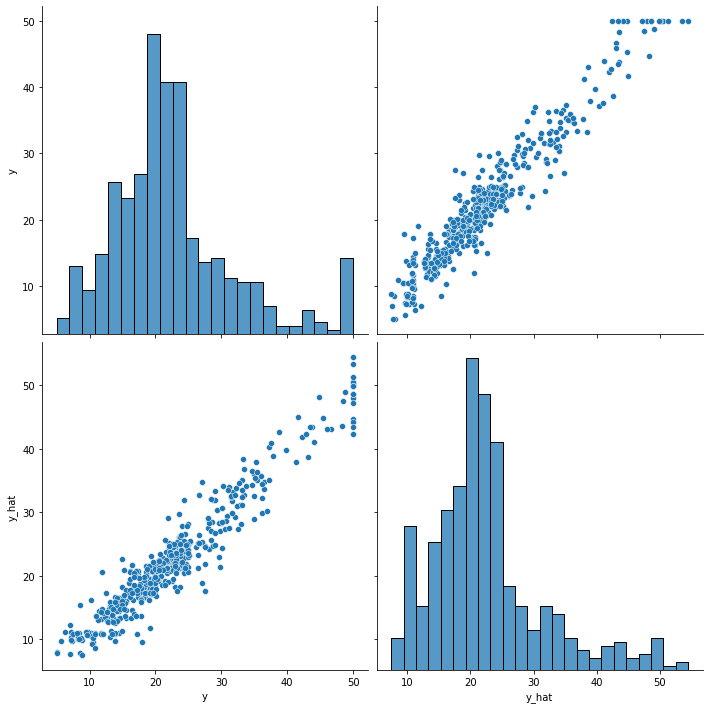

In [11]:
df = pd.DataFrame(torch.cat([y, y_hat], dim = 1).detach_().numpy(),
                  columns = ['y', 'y_hat'])

sns.pairplot(df, height = 5)
plt.show()

# 실제 값과 유사한 분포를 보여주고있다.

## 9.7 마치며

### 요약

1. 심층신경망
 - 선형 회귀 또는 로지스틱 회귀는 비선형 문제를 풀 수 없다.
 - 선형 계층들 사이에 비선형 활성 함수를 넣어 비선형 함수로 만들 수 있다.
 - 선형 계층과 비선형 활성 함수를 반복해서 쌓아 심층신경망을 구성할 수 있다.
 - 학습 방법은 기존 선형 회귀와 비슷하다.
 - 신경망의 깊이와 너비는 하이퍼 파라미터로 깊이가 깊고 너비가 넓을수록 복잡한 함수를 배울 수용 능력이 높아진다.

2. 역전파 알고리즘
 - 역전파 알고리즘은 체인 룰을 활용하여 복잡한 수식의 미분을 작게 분리하려 효율적으로 계산 및 계산 결과를 재활용할 수 있게한다.

3. 그래디언트 소실
 - 시그모이드와 탄에이치 함수의 기울기 값은 전 영역에서 1 이하다.
 - 이런 활성화 함수는 반복 사용될수록 신경망의 입력 쪽 계층 가중치 파라미터의 그래디언트는 작아진다.
 - 그래디언트가 계속 작아지면 가중치 파라미터 업데이트를 거의 할 수 없으므로, 학습이 진행되지않는다.

 4. ReLU
  - 그래디언트 소실 문제를 어느 정도 해소한다.
  - LeakyReLU는 음의 영역에 기울기가 존재하지만, ReLU와 성능면에서 우위를 정할수는 없다.